In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 

In [19]:
df = pd.read_csv('train_data.csv')
df

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,1,10,2018,3,31,0,1,1,0,1,1,0,2,0,0,0,95.00,0,0
1,2,116,2018,2,28,2,1,1,0,1,1,0,0,0,0,0,61.00,0,0
2,3,11,2018,7,25,1,2,1,0,1,2,1,0,0,0,0,129.75,1,1
3,4,3,2017,9,12,0,1,1,0,1,2,0,0,0,0,0,152.00,3,1
4,5,28,2018,3,7,1,3,1,0,1,2,0,1,0,0,0,87.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,29016,2,2018,11,21,1,2,1,0,1,1,0,0,0,0,0,100.67,1,1
29016,29017,18,2018,4,12,0,2,0,0,1,2,0,0,0,0,0,119.00,1,1
29017,29018,8,2017,9,29,0,3,1,0,1,1,0,2,0,0,0,65.00,0,1
29018,29019,20,2018,9,18,2,2,1,0,1,1,0,1,0,0,0,90.00,0,0


<AxesSubplot: >

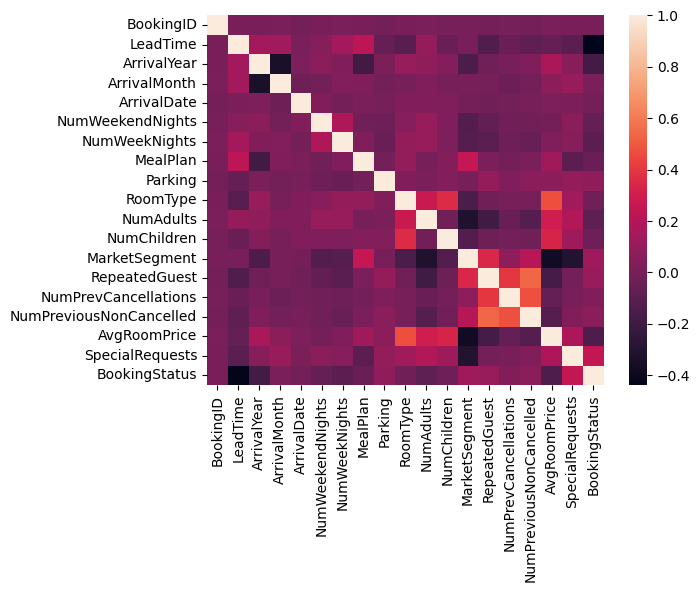

In [20]:
import seaborn as sns
sns.heatmap(df.corr())

In [4]:
X = df.drop('BookingStatus', axis=1) # features
y = df['BookingStatus'] # target value

0            Canceled
1            Canceled
2        Not_Canceled
3        Not_Canceled
4        Not_Canceled
             ...     
29015    Not_Canceled
29016    Not_Canceled
29017    Not_Canceled
29018        Canceled
29019    Not_Canceled
Name: BookingStatus, Length: 29020, dtype: object

In [5]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train.values

array([[8898, 55, 2018, ..., 0, 56.94, 0],
       [25532, 29, 2018, ..., 0, 109.2, 1],
       [10112, 40, 2018, ..., 0, 88.2, 0],
       ...,
       [15244, 3, 2018, ..., 0, 95.0, 0],
       [7462, 0, 2017, ..., 7, 0.0, 0],
       [4378, 30, 2018, ..., 0, 86.4, 0]], dtype=object)

In [6]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [18]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train.values, y_train)
    fit_models[algo] = model

ValueError: could not convert string to float: 'Meal Plan 1'